In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.tensor as tensor
import sklearn
from sklearn import model_selection
from sklearn import preprocessing

In [2]:
#cleaning data
df = pd.read_csv("correct.csv")
df = df.drop(columns = ['week_start_date'])
df['city'] = df['city'].str.replace('sj','0').replace('iq','1')


In [3]:
#cleaning data
ef = pd.read_csv("dengue/dengue_labels_train.csv")
ef = ef.drop(columns = ['year','weekofyear','city'])
#ef['city'] = ef['city'].str.replace('sj','0').replace('iq','1')



In [4]:
#training data 
X = df.as_matrix()
X = np.asarray(X,dtype = np.float32)
#X.T[2] = (np.array((X.T[2]<10)&(X.T[2]>30),dtype=np.int8))
X_plot = X.copy()
Xd = X.T[:7].T
Xf = X.T[7:].T
std = np.std(Xf,axis=0)
mean = np.mean(Xf,axis=0)
Xf = (Xf-mean)/std
Xd.T[1] = (Xd.T[1]-1990)/(2014-1990)
maxd = Xd.T[2].max()
mind = Xd.T[2].min()
Xd.T[2] = (Xd.T[2]-mind)/(maxd-mind)
#print(Xf.shape,Xd.shape)
print(X)
X = np.append(Xd,Xf,axis=1)
Y = ef.as_matrix()
Y = np.asarray(Y,dtype = np.float32)
Y_plot = Y.copy()
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,shuffle=True,test_size = 0.2)

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[[ 0.          0.          0.32692307 ... 29.4        20.
  16.        ]
 [ 0.          0.          0.34615386 ... 31.7        22.2
   8.6       ]
 [ 0.          0.          0.3653846  ... 32.2        22.8
  41.4       ]
 ...
 [ 1.          0.8333333   0.42307693 ... 32.2        19.2
   7.4       ]
 [ 1.          0.8333333   0.44230768 ... 31.2        21.
  16.        ]
 [ 1.          0.8333333   0.46153846 ... 33.7        22.2
  20.4       ]]


C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


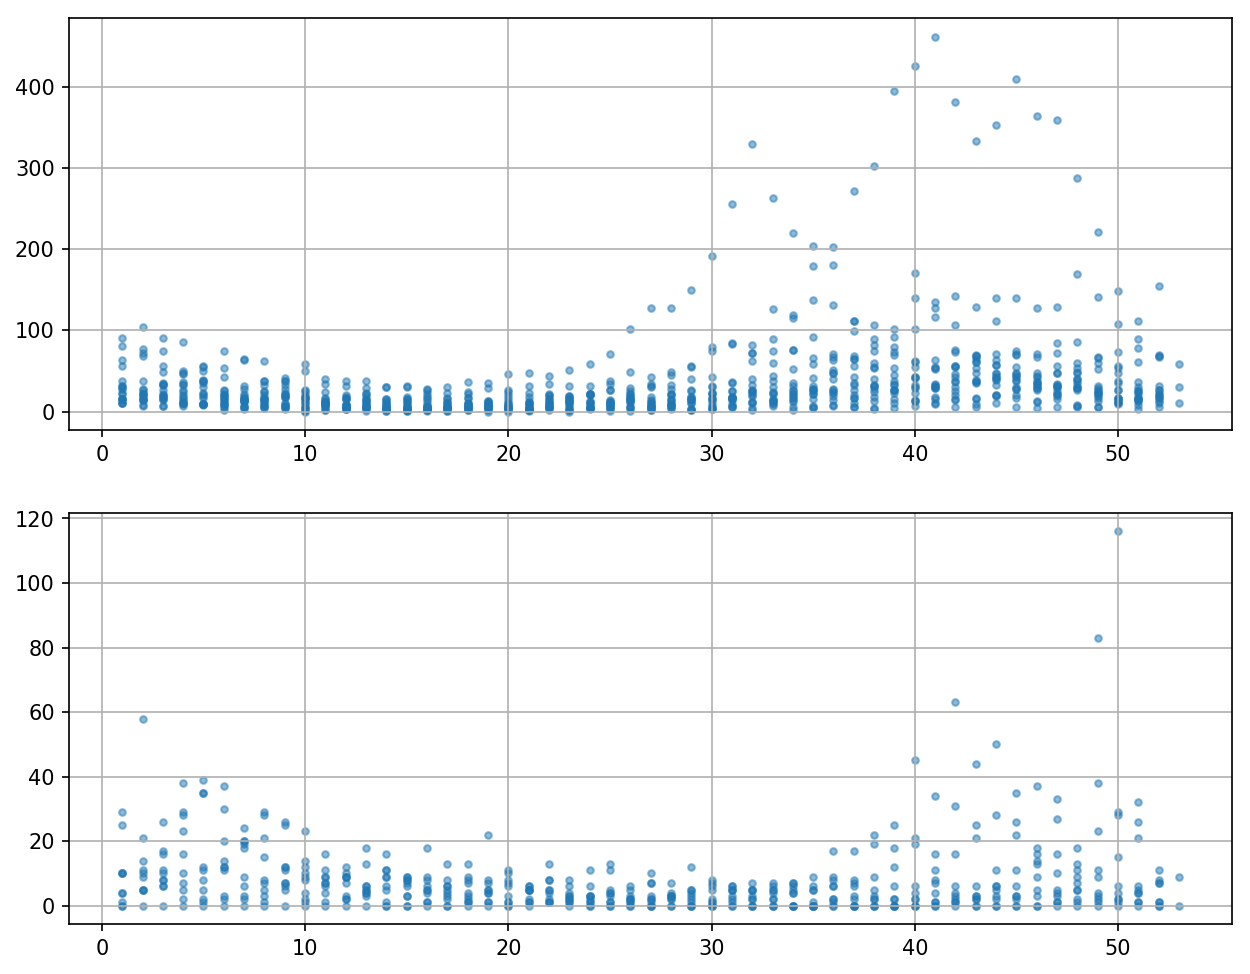

In [56]:
#data visualization
x_axis = list()
y_axis = list()
x_axisR = list()
y_axisR = list()
for arrX, arrY in zip(X_plot,Y_plot):
    if arrX[0] == 0:
        x_axis.append(arrX[2])
        y_axis.append(arrY[0])
    else:
        x_axisR.append(arrX[2])
        y_axisR.append(arrY[0])

#print(RX_plot)R
plt.figure(figsize=(10,8), dpi=150)
weeks = np.arange(1,54,1)

plt.subplot(2,1,1)
plt.scatter(x_axis,y_axis,s=10,alpha=0.5)
plt.grid(True)
plt.subplot(2,1,2)
plt.scatter(x_axisR,y_axisR,s=10,alpha=0.5)
plt.grid(True)
plt.show()

In [5]:
#check data
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)


(1164, 23)
(1164, 1)
(292, 1)


In [6]:
#Parameters
input_size = X_train.shape[1]
output_size = Y_train.shape[1]
noofeg = X_train.shape[0]
H1 = 100
H2 = 30
H3 = 10
l_r = 1e-4
iteration = 100000



In [7]:
#Neural Network
X_train = torch.autograd.Variable(tensor(X_train,dtype=torch.float32))
Y_train = torch.autograd.Variable(tensor(Y_train,dtype=torch.float32))
X_test = torch.autograd.Variable(tensor(X_test,dtype=torch.float32))
Y_test = torch.autograd.Variable(tensor(Y_test,dtype=torch.float32))
model = nn.Sequential(
    nn.Linear(input_size,H1),
    nn.BatchNorm1d(H1),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(H1,H2),
    nn.BatchNorm1d(H2),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(H2, H3),
    nn.BatchNorm1d(H3),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(H3, output_size),
)

optimizer = torch.optim.Adam(model.parameters(),lr = l_r,weight_decay=0.05)
#loss_fn = nn.MSELoss()
loss_fn = nn.L1Loss()
#loss_fn = nn.SmoothL1Loss()



In [ ]:
model.train()
err_temp = 100
for i in range(iteration):
    Y_pred = model(X_train)
    loss = loss_fn(Y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%1000 == 0:
        print(i , loss.item(),end = '\t')
        Y_test_pred = model(X_test)
        err_test = abs(Y_test_pred-Y_test).sum().item()/292
        print("Test" , err_test, "l_r",l_r)
        if err_test>err_temp:
            l_r /= 3
            for param_group in optimizer.param_groups:
                 param_group['lr'] = l_r
        err_temp = err_test

torch.save(model,"modelbatch.tar")
        

0 24.953134536743164	Test 22.417204556399827 l_r 0.0001
1000 24.251041412353516	Test 21.706143313891268 l_r 0.0001
2000 23.293989181518555	Test 20.80911213077911 l_r 0.0001
3000 22.05126953125	Test 19.757394450984588 l_r 0.0001
4000 20.64154052734375	Test 18.68986950181935 l_r 0.0001
5000 19.14180564880371	Test 17.709435867936644 l_r 0.0001
6000 17.478212356567383	Test 16.652746749250856 l_r 0.0001
7000 15.657208442687988	Test 15.57233585723459 l_r 0.0001
8000 14.191362380981445	Test 15.011859214469178 l_r 0.0001
9000 12.400863647460938	Test 14.339271858946917 l_r 0.0001
10000 11.111723899841309	Test 14.620157320205479 l_r 0.0001
11000 10.411087989807129	Test 14.593815215646405 l_r 3.3333333333333335e-05


In [105]:
torch.save(model,"modelbatch.tar")

In [106]:
ff = pd.read_csv("Dengue/dengue_features_test.csv")
ff = ff.drop(columns = ['week_start_date'])
ff['city'] = ff['city'].str.replace('sj','0').replace('iq','1')
X_inf = ff.as_matrix()
X_inf = np.asarray(X_inf,dtype = np.float32)
Xd_inf = X_inf.T[:7].T
Xf_inf = X_inf.T[7:].T
Xd_inf.T[1] = (Xd_inf.T[1]-1990)/(2014-1990)
Xd_inf.T[2] = (Xd_inf.T[2]-mind)/(maxd-mind)
Xf_inf = (Xf_inf-mean)/std
X_inf = np.append(Xd_inf,Xf_inf,axis=1)
#print(X_inf)
X_inf = torch.autograd.Variable(tensor(X_inf,dtype=torch.float32))
model = torch.load("modelbatch.tar")
model.eval()
Y_inf = model.forward(X_inf)
print(Y_inf)
Y_inf = model.forward(X_inf)
print(Y_inf)

gf = pd.read_csv("Dengue/submission_format.csv")
mat = np.array(Y_inf.detach().numpy())
mat = np.rint(mat) 
mat = np.array(mat,dtype=np.int8)
gf['total_cases'] = pd.DataFrame(mat)
print(gf.head())
gf.to_csv("subbatch.csv",index=False)


tensor([[  8.7701],
        [  6.1239],
        [ 41.2116],
        [ 41.2116],
        [  7.5605],
        [ 10.6326],
        [ 11.0813],
        [ 41.2116],
        [  9.7447],
        [ 10.8122],
        [  9.4373],
        [ 41.2116],
        [  7.0494],
        [ 10.7453],
        [ 13.3602],
        [ 41.2116],
        [ 20.3802],
        [ 41.2116],
        [ 41.2116],
        [  8.2810],
        [ 15.2897],
        [ 15.7624],
        [ 22.5507],
        [ 16.2779],
        [ 35.5531],
        [ 14.3813],
        [  9.5997],
        [ 20.1387],
        [ 15.9460],
        [ 41.2116],
        [ 13.1833],
        [  9.0125],
        [  9.3979],
        [  8.9572],
        [ 10.7237],
        [ 41.2116],
        [ 10.3280],
        [  9.9733],
        [  7.4415],
        [  7.5776],
        [  9.9607],
        [  6.5134],
        [  6.0834],
        [  5.1808],
        [  2.9594],
        [ 41.2116],
        [  4.9527],
        [  5.1515],
        [  3.5475],
        [  6.1183],


C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
